In [289]:
class argsclass():
    pass
args = argsclass()

args.experiment_name='convlstm_batch_6_samples_5_in_2_out_20_normal_lr_0.001' 
args.normalizer_type='normal'
args.test_starting_point=15
args.show_plots=True
args.debug=True
args.num_workers = 4
args.num_output_frames = 15
args.batch_size = 16
args.dataset='original'
args.model_type='convlstm'
args.num_input_frames=5
args.num_epochs=100

In [290]:
import sys
sys.path.append('..')
sys.path.append('../..')
import logging
import torch
import matplotlib.pyplot as plt
from utils.arg_extract import get_args
from utils.experiment_evaluator import Evaluator, get_sample_predictions
from utils.experiment import Experiment

plt.ioff()
logging.basicConfig(format= '%(message)s', level=logging.INFO)

# args = get_args()

experiment = Experiment(args)
# experiment.createnew()
experiment.load_from_disk(test=True)
# evaluator = Evaluator(args.test_starting_point, experiment.normalizer_type)

Experiment convlstm_batch_6_samples_5_in_2_out_20_normal_lr_0.001
Creating directories
use CPU
Loading datasets
Loading model /Users/stathis/Code/thesis/wave_propagation/experiments_results/convlstm_batch_6_samples_5_in_2_out_20_normal_lr_0.001/models/model_best.pt


In [291]:
pdir = "/Users/stathis/Code/thesis/wave_propagation/experiments_results/AR_LSTM_batch16_samples10_epoch_25_out20_none/predictions_debug"
# model = experiment.model
dataloader = experiment.dataloaders['train']
device = experiment.device
figures_dir = pdir
normalizer = experiment.normalizer
debug = args.debug

batch_images = next(iter(dataloader))

In [292]:
import seaborn as sns
from utils.plotting import imshow
from utils.experiment_evaluator import get_test_predictions_pairs, save_sequence_plots

def show_prediction_plot(title, predicted, target, normalize):
    # -1 means print last frame
    # predicted = predicted[image_to_plot, -1:, :, :].cpu()
    # target = target[image_to_plot, -1:, :, :].cpu()
    fig = plt.figure(figsize=(6, 6))
    sns.set(style="white")  # darkgrid, whitegrid, dark, white, and ticks
    sns.set_context("talk")
    pred = fig.add_subplot(1, 2, 1)
    imshow(predicted, title="Predicted", smoothen=True, obj=pred, normalize=normalize)
    tar = fig.add_subplot(1, 2, 2)
    imshow(target, title="Target", obj=tar, normalize=normalize)
    fig.suptitle(title)
    plt.show()
    plt.close()

In [293]:
sys.path.append('/home/s1680171/wave_propagation/nanton')

In [309]:
from models.PredRNNPP import PredRNNPP
model = PredRNNPP(5, 2, 1, 'cpu', False)

In [311]:
inp = batch_images[f:f+2,:5,:,:]
model(inp, 10).size()

torch.Size([2, 10, 128, 128])

In [296]:
cmodel = experiment.model
batch_images.size()

torch.Size([16, 100, 128, 128])

In [297]:
f=7
inp = batch_images[f:f+1,:5,:,:]
print(inp.size())
out = cmodel(inp, 100)
print(out.size())
out2 = cmodel.get_future_frames(inp, 100)
print(out2.size())
target = batch_images[f:f+1,5:,:,:]
print(target.size())

torch.Size([1, 5, 128, 128])
torch.Size([1, 100, 128, 128])
torch.Size([1, 100, 128, 128])
torch.Size([1, 95, 128, 128])


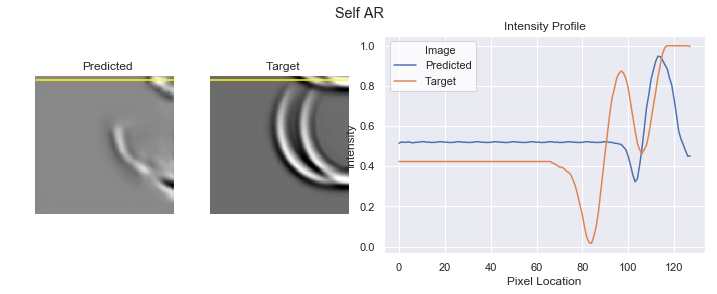

In [305]:
from utils.plotting import get_cutthrough_plot
from utils.experiment_evaluator import image_prepro

frame = 60
predicted = image_prepro(out[0, frame, :, :].detach().numpy(), experiment.normalizer)
predicted2 = image_prepro(out2[0, frame, :, :].detach().numpy(), experiment.normalizer)
tar = image_prepro(target[0, frame, :, :].detach().numpy(), experiment.normalizer)
get_cutthrough_plot('Self AR', predicted, tar, 'Horizontal', location=None)
# get_cutthrough_plot('Belated AR', predicted2, tar, 'Horizontal', location=None)
# plt.show()
# plt.close()

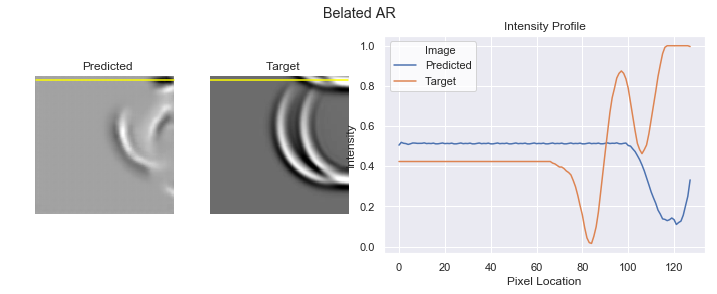

In [306]:
get_cutthrough_plot('Belated AR', predicted2, tar, 'Horizontal', location=None)